In [3]:
# Use this if you need it    
# https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

# Week of Oct. 21 HW
### Question 1 

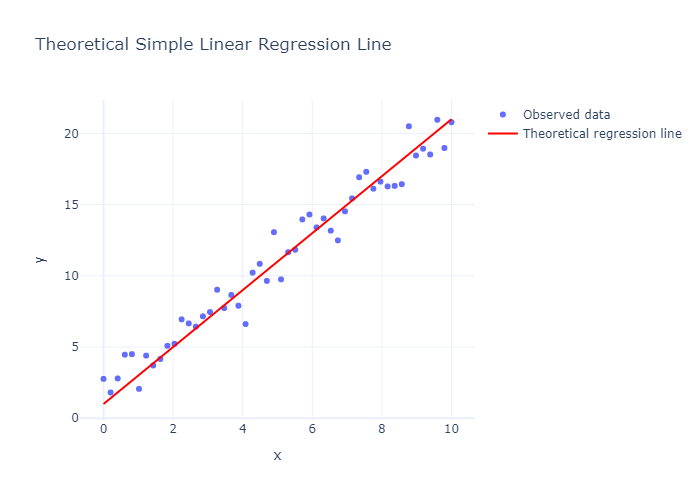

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
import plotly.graph_objects as go

# Generate some example data
np.random.seed(0)  # For reproducibility
x_i = np.linspace(0, 10, 50)  # Independent variable (predictor)
beta1 = 2  # True slope of the theoretical regression line
beta0 = 1  # True intercept of the theoretical regression line
Y_i = beta1 * x_i + beta0 + np.random.normal(scale=1.0, size=x_i.shape)  # Dependent variable (response)

# Calculate theoretical regression line without fitting
y_theoretical = beta1 * x_i + beta0  # Using known slope and intercept

# Create a scatter plot for observed data
scatter = go.Scatter(x=x_i, y=Y_i, mode='markers', name="Observed data")

# Create a line plot for the theoretical regression line
line = go.Scatter(x=x_i, y=y_theoretical, mode='lines', name="Theoretical regression line", line=dict(color="red"))

# Combine the traces in a figure
fig = go.Figure(data=[scatter, line])

# Update layout for titles and labels
fig.update_layout(
    title="Theoretical Simple Linear Regression Line",
    xaxis_title="x",
    yaxis_title="y",
    template="plotly_white"
)

fig.show(renderer="png")

Predicator $x_i$ is a independent numeric value, it is used to calculate $Y_i$. Outcome $Y_i$ is the result that is calculated using the predicator, and slope or intercept coefficients. The slope coefficient is a constant numeric value that gives us the slope of the equation. And the intercept coefficient is also a constant, and it represents the outcome $Y_i$ when the predicator $x_i$ is 0. Finally the error term introduces the variance that could be present within the data. Since the error term is normally distributed, the outcome $Y_i$ would also be normally distributed. 

##### Chat Summary (Custom ChatBot)
This conversation has focused on understanding simple linear regression.
You initially asked for a definition of simple linear regression and received an explanation that included its mathematical formula and key assumptions [no source].
Then you asked how the components of simple linear regression combine to form a sample from a normal distribution.
The response explained that the normally distributed error term in the model is what leads the outcome variable to also be normally distributed [no source].
Finally, you accurately summarized the components of a simple linear regression model in your own words [no source].

##### Chat Summary (For coding)

https://chatgpt.com/share/672a4bb8-2368-8013-9350-69c63c5b722b

Simple Linear Regression Example (Unfitted): You asked for a demonstration of theoretical simple linear regression using Python's numpy and scipy.stats libraries. I provided a code snippet that generated example data, computed the theoretical regression line (using a known slope and intercept), and displayed the results using matplotlib. Plot as PNG: You requested a PNG version of the graph, which I provided using matplotlib. Plotly Version: You then asked to see the graph using Plotly. I provided code to generate and save the graph with Plotly, but encountered an issue because kaleido (required for saving Plotly images) wasn't available in this environment. Installing Kaleido: I suggested a workaround: installing kaleido locally with pip install -U kaleido to enable Plotly image saving on your machine.

### Question 2

In [37]:
import pandas as pd 
import numpy as np

# Generate some example data
np.random.seed(0)  # For reproducibility
x_i = np.linspace(0, 10, 50)  # Independent variable (predictor)
beta1 = 2  # True slope of the theoretical regression line
beta0 = 1  # True intercept of the theoretical regression line
Y_i = x_i * beta1 + beta0 + np.random.normal(scale=1.0, size=x_i.shape)  # Dependent variable (response)

df = pd.DataFrame({'x_i': x_i, 'Y_i': Y_i})

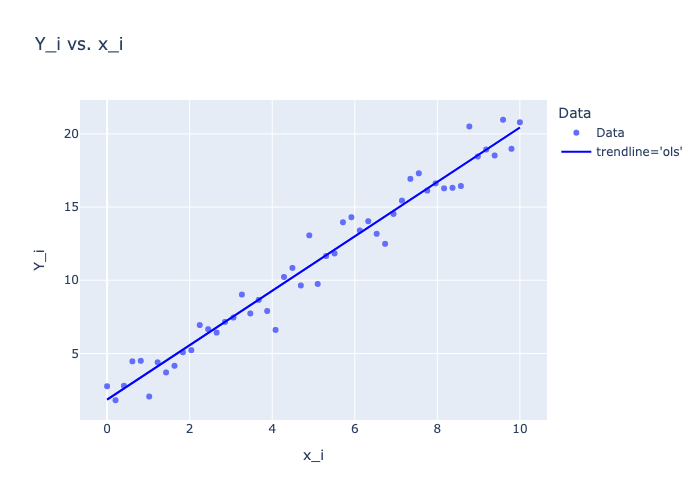

In [38]:
import statsmodels.formula.api as smf  # this is for smf.ols 
import plotly.express as px  # this is a ploting library

model_data_specification = smf.ols("Y_i ~ x_i", data=df)  # calculating the ordinary least squares
fitted_model = model_data_specification.fit()  # fitting the model to the data 

fitted_model.summary()  # shows a comprehensive summary of the ols regression 
fitted_model.summary().tables[1]  # only shows the coefficients of the model 
fitted_model.params  # returns the beta0 and beta1 values 
fitted_model.params.values  # returns beta0 and beta1 in an array, useful for calculations 
fitted_model.rsquared  # returns the R-squared value of the model 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x_i',  y='Y_i', color='Data', 
                 trendline='ols', title='Y_i vs. x_i')  # creates the scatter plot, and the ols trendline 

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x_i'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

##### Chat Summary

https://chatgpt.com/share/672a8b6e-5830-8013-b883-c17a4494668d

Simulated Linear Data:
You created a simulated dataset with a linear relationship and added noise. This data was then stored in a DataFrame.

Fitting a Linear Regression Model:
We used LinearRegression from sklearn and statsmodels.formula.api (smf.ols) to fit a simple linear regression model to the data.
The model produced a line of best fit with a slope and intercept close to the true values you used to generate the data.

Explanation of Code Elements:
We discussed what each part of your statsmodels code does, including fitted_model.summary() for a full statistical summary, fitted_model.params for retrieving coefficient values, and plotting with plotly.express to visualize the data and trendline.
I explained that fitted_model.params gives you the intercept and slope (labeled as Intercept and x_i) in statsmodels.

Concepts of R^2 and OLS:
We clarified that 𝑅^2 represents the proportion of variance explained by the model, and the OLS trendline is essentially the line of best fit, minimizing the sum of squared residuals.

### Question 3

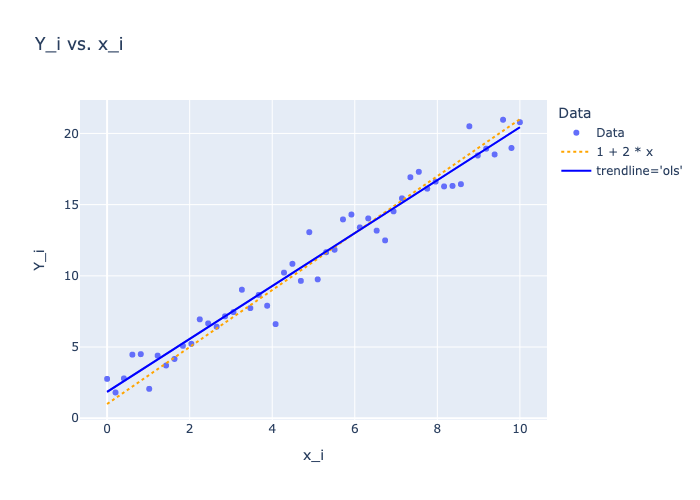

In [39]:
import plotly.express as px 

model_data_specification = smf.ols("Y_i ~ x_i", data=df) 
fitted_model = model_data_specification.fit()

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x_i',  y='Y_i', color='Data', 
                 trendline='ols', title='Y_i vs. x_i')

beta1 = 2
beta0 = 1
x_range = np.array([df['x_i'].min(), df['x_i'].max()])
y_line = beta0 + beta1 * x_range

fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.add_scatter(x=df['x_i'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

The OLS trendline is the estimated line of best fit derived from the observed data. OLS trendline is derived purely from the data using the ordinary least square method. The theoretical trendline represents the expected relationship between the outcome $Y_i$ and the predicator $x_i$. For example, the theoretical line from question 1 is calculated without the error term, but in question 2 when we created the OLS trendline, we had to add the error term to get it. Theoretical line is the OLS trendline without the random sampling variation that is present when we simulate our sample. 

##### Chat Summary 

https://chatgpt.com/share/672bbbda-1530-8013-8244-076e0e5362ea

You asked about the difference between an OLS trendline and a theoretical trendline. I explained that an OLS trendline is a data-driven best-fit line derived through Ordinary Least Squares, reflecting actual patterns in your dataset. In contrast, a theoretical trendline is based on an expected or hypothesized relationship between variables, built from models or assumptions rather than empirical data. Comparing the two can help assess how well a theoretical model aligns with observed data.

##### Chat Summary (Custom ChatBot)
This conversation explored the difference between theoretical and OLS trendlines in the context of simple linear regression.
A theoretical trendline embodies the true relationship between predictor and outcome variables, as defined by a model, but this perfect relationship is usually unobservable.
An OLS trendline is estimated from observed data using the "ordinary least squares" method to find the line that best fits the data by minimizing the sum of squared residuals.
The conversation used the example of modeling the association between bird flu cases and the price of shuttlecocks to illustrate this distinction.
The theoretical trendline would represent the actual underlying connection, while the OLS trendline would approximate it based on the available data, acknowledging potential variability due to sampling.
You can further your understanding of simple linear regression from the sources provided:
They describe the process of fitting OLS trendlines in Python using packages like statsmodels.
They discuss the evaluation of model fit using residuals, and the interpretation of R-squared as a measure of model accuracy.
They distinguish between in-sample and out-of-sample predictions.
You can also learn about the assumptions of the simple linear regression model and assess their validity using the provided code.


### Question 4
fitted_model.fittedvalues uses fitted_model.params and fitted_model.params.values to calcuate the predicated values of an outcome $Y_i$. In the regression summary fitted_model.summary().table[1] shows the estimated values for the coefficients for each predicator in the model. Finally the outcome is generated using the formula $Y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip}$ and is stored in fitted_model.fittedvalues

##### Chat Summary 

https://chatgpt.com/share/672c171d-4294-8013-86e2-68fad685e7e9

We discussed how the fitted values (fitted_model.fittedvalues) in a regression model are derived based on the model’s estimated parameters (fitted_model.params). Specifically, I explained that these fitted values represent the model's predicted values for each observation, calculated as a linear combination of the intercept and the coefficients for each predictor variable (shown in fitted_model.summary().tables[1]). The formula for each fitted value involves summing the products of each predictor's value with its corresponding coefficient, yielding the predictions stored in fitted_model.fittedvalues.

### Question 5

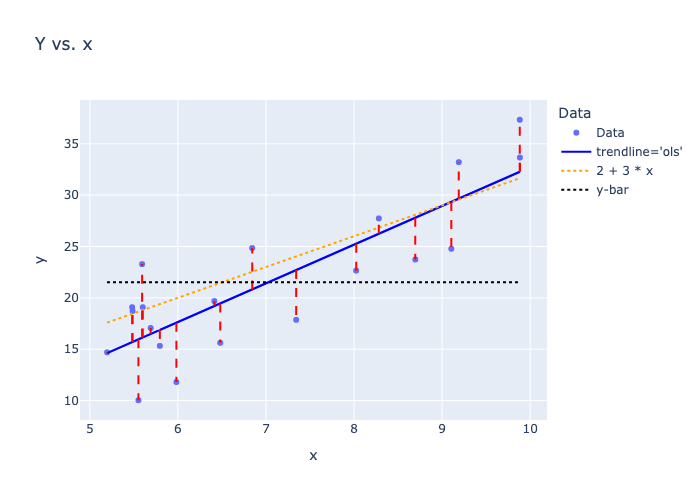

In [40]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")

OLS works by minimizing the sum of squared differences, aka the residual, between the observed data and the theoretical data. The OLS line is chosen by making the residuals as small as possible. 

##### Chat Summary 

https://chatgpt.com/share/672c1cca-4c80-8013-ac1e-ecba09d44d44

OLS Fit Line Choice: The OLS method selects the best-fit line by minimizing the squared residuals (differences between observed and predicted values). Squaring the residuals prevents negative values from canceling out positives and penalizes larger deviations, producing a line that best captures the data’s trend.

Different Lines in Visualization: In the plot, two lines are shown:
The blue OLS-fitted line, based on the statsmodels OLS fit to the data, minimizes residuals and closely follows the data.
The orange theoretical line is based solely on predefined parameters beta0 and beta1 and does not account for random error added to the data, so it deviates from the actual points.
Overlaying Two OLS Lines: Adding the line with fig.add_scatter(...) does not change the original OLS trendline. It simply duplicates it, overlaying a second visualization of the same fitted model. Minor rendering differences may make it appear slightly different, but both represent the same OLS fit.


### Question 6
1. ((Y - fitted_model.fittedvalues) ** 2).sum() is the SSR (Residual Sum of Squares), it measures the variance in the observed data that is not explained. ((Y - Y.mean()) ** 2).sum() is the SST (Total Sum of Squares), it measures the total variance in the observed data. So when we are calculating the percentage of the data that is not explained, when we divide SSR by SST. By the quotient from 1, we are then calculating the percentage of variance that is explained by the data, aka R-Squared. 
2. From the first part, we know R-Squared is the variability that is predicated by the predicator(s). So, it is clear to see that fitted_model.rsquared is a measurement of the accuracy of the model because from it we know the percentage of the variance that is expected or predicated. 
3. A different way to calcalute the R-squared value. np.corrcoef(Y, fitted_model.fittedvalues)[0, 1] ** 2,  computes the correlation matrix between Y and $\hat{Y}$, and the [0, 1] selects the Pearson correlation coefficient of Y and $\hat{Y}$. Finally the square of the Pearson correlation coefficient is equal to R-squared. 
4. Similarly, np.corrcoef(Y, x)[0, 1] ** 2 also computes the correlation matrix, instead it's of the outcome Y and the predicator x. Again, the [0, 1] position is where the Pearson correlation coefficient is located, and the square of it is equal to R-squared. 

##### Chat Summary 

https://chatgpt.com/share/672c3463-baac-8013-91e8-10be604ad4ed

In this session, we discussed different methods for calculating the coefficient of determination (𝑅^2) in regression analysis and how it relates to the Pearson correlation coefficient.

Calculation of 𝑅^2: 𝑅^2 represents the proportion of variance in the dependent variable explained by the independent variable(s) in a regression model.
One way to calculate 𝑅^2 is by comparing the total variance in the data to the variance that is explained by the model. This is done using the observed values and the predicted values from the model.
Alternatively, 𝑅^2 can be computed by squaring the Pearson correlation coefficient between the observed values and the predicted values. This is a simpler approach that directly reflects the strength of the linear relationship between the two sets of values.

Understanding the Correlation Matrix: The correlation matrix produced by np.corrcoef shows the relationships between the variables. The value at position [0,0] represents the correlation of the observed values with themselves, which is always 1. The values at positions [0,1] and [1,0] show the Pearson correlation between the observed values and the predicted values (or between two variables, like Y and 𝑥).
The value at position [1,1] represents the correlation of the predicted values with themselves, which is also always 1.
Clarification on Using Predicted Values ($\hat{y}_i$): The predicted values, $\hat{y}_i$, are the values produced by the model based on the independent variable(s). These are used when calculating 𝑅^2, as they represent the model’s predictions compared to the actual observed data.

Key Takeaways: 𝑅^2 indicates how much of the variation in the dependent variable is explained by the independent variables in a regression model. The Pearson correlation coefficient is closely related to R^2, and squaring the correlation between the observed and predicted values gives the R^2 value. The correlation matrix helps us understand how the variables are related, with the value at position [1,1] always being 1 (since a variable is always perfectly correlated with itself).


### Question 7

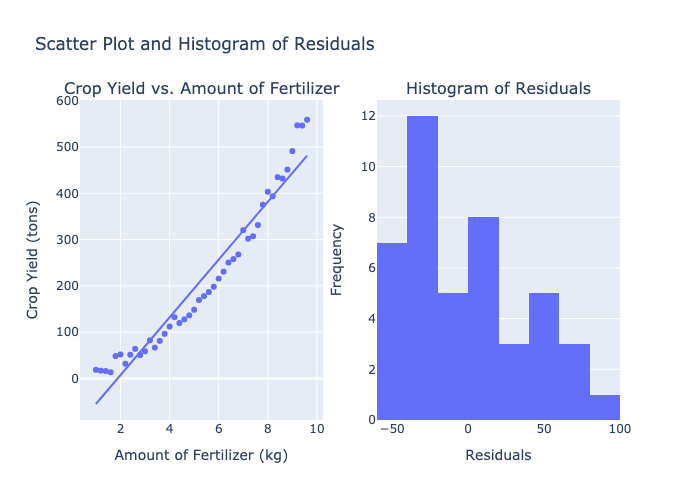

In [41]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

One of the assumptions of the Simple Linear Regression model is that the $\epsilon_i$ error term has to be normally distributed. And since the residuals $e_i$ estimates the error term, if the residual isn't normally distributed this means that normality isn't present for the error term either. Therefore this set of data doesn't comply with the normality of the error term assumption of the Simple Linear Regression model. 

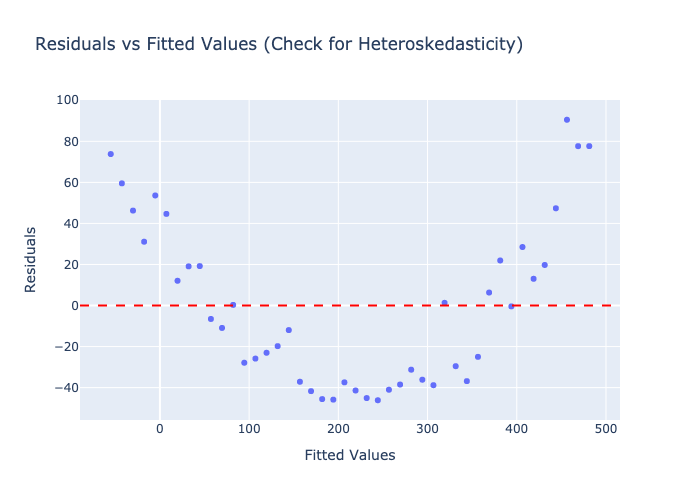

In [42]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

# Create a DataFrame from the given data
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}

df = pd.DataFrame(data)

# Add a constant term for the intercept in the regression model
X = sm.add_constant(df['Amount of Fertilizer (kg) (x)'])
y = df['Crop Yield (tons) (Y)']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Get the fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Create a scatter plot of residuals vs fitted values to check for heteroskedasticity
residual_heteroskedasticity = px.scatter(x=fitted_values, y=residuals, 
                                         title="Residuals vs Fitted Values (Check for Heteroskedasticity)")
residual_heteroskedasticity.update_layout(xaxis_title="Fitted Values", yaxis_title="Residuals")
residual_heteroskedasticity.add_hline(y=0, line_dash="dash", line_color="red")
residual_heteroskedasticity.show(renderer="png")

Here I am checking for heteroskedasticity, and clearly heteroskedasticity is present in the data set. There is a clear pattern in increase and decrease of residual as the fitted values change. So heteroskedasticity is likely present. And again, this fails another assumption of the Simple Linear Regression model.

# Week of Nov 4 HW

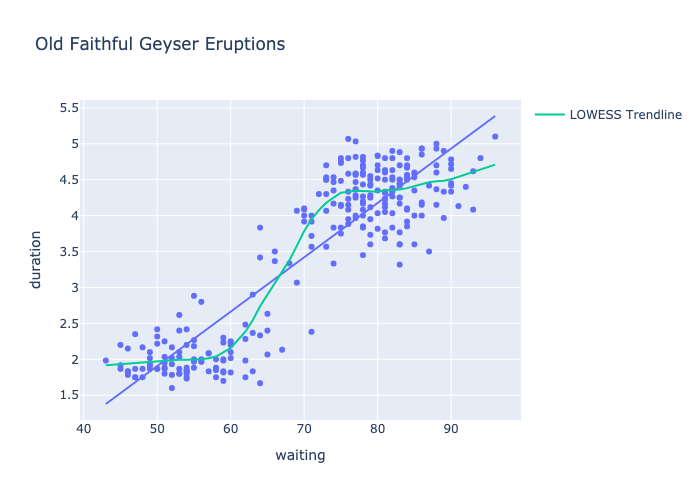

In [43]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Question 8

In [44]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:15:24   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0: \beta_1 = 0$, if the slope coefficient $\beta_1$ is equal to 0, it means that there is no linear association (on average) between the waiting time and the duration. So, we will be choosing a typical significance level $\alpha = 0.05$. And from the summary table present, we can see that the p-value for the slope coefficient $\beta_1$ is equal to 0, and it is less than our chosen significance level $\alpha = 0.05$. Therefore it provides very strong evidence against the null hypothesis. Therefore, there is a linear association between the waiting time and the duration of the eruption. 

##### Chat Summary 

https://chatgpt.com/share/672cd161-82d4-8013-896a-8f26645693e4

In this analysis, we examined the linear relationship between waiting time and eruption duration in the Old Faithful geyser dataset, using a simple linear regression model. Our null hypothesis (𝐻_0: 𝛽_1 = 0) stated that there is no linear association between waiting time (waiting) and eruption duration (duration), meaning that the average slope of this relationship is zero. Upon reviewing the model summary from fitted_model.summary(), we observed a very small p-value for the coefficient 𝛽_1. This small p-value provides strong evidence against the null hypothesis, indicating that there likely is a statistically significant linear association between waiting time and eruption duration. Thus, we reject the null hypothesis and conclude that waiting is a significant predictor of duration in this dataset.

### Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


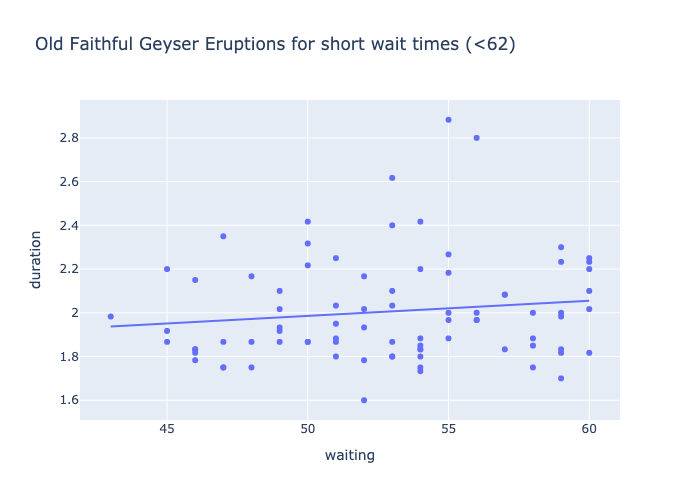

In [ ]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 #62 # 64 # 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Our null hypothesis will be $H_0: \beta_1 = 0$, and our chosen signifiance level will be $\alpha = 0.05$. From the summary table shown, the p-value of the slope coefficient $\beta_1$ is equal to 0.238. Which is significantly higher than our chosen $\alpha = 0.05$. Therefore we are unable to reject the null hypothesis due to our very weak evidence. To conclude, there is no linear association between the wait time and the duration of the eruption. 

### Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


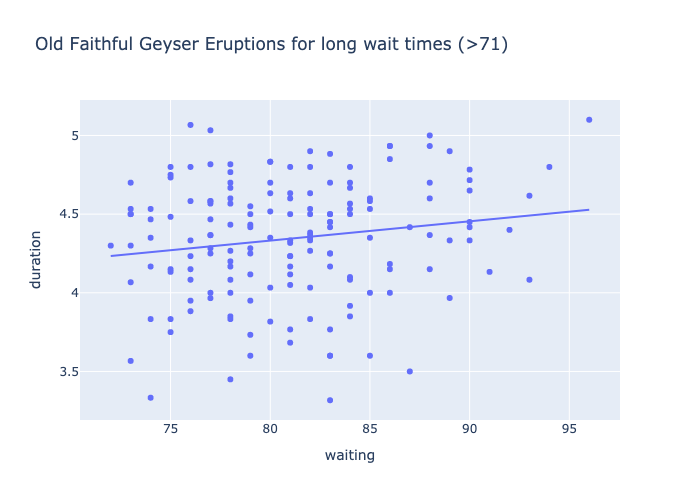

In [46]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for long wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

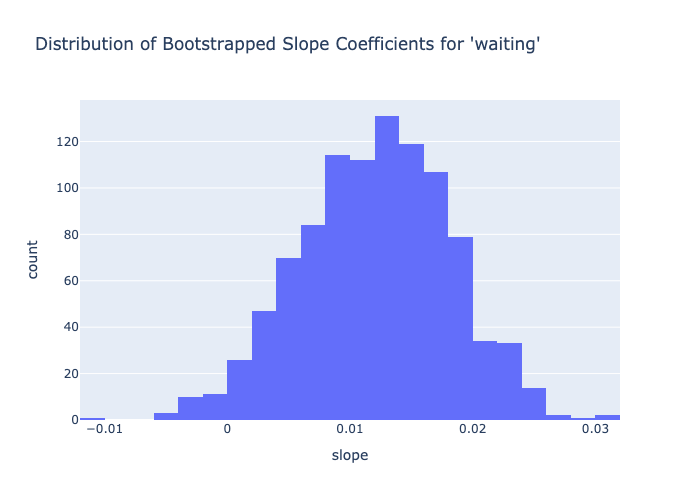

In [47]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Assuming old_faithful DataFrame is already loaded
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Parameters
n_bootstraps = 1000  # Number of bootstrap samples
slope_coefficients = []

# Bootstrapping
for _ in range(n_bootstraps):
    # Resample with replacement
    sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    
    # Fit the model
    model = smf.ols('duration ~ waiting', data=sample).fit()
    
    # Extract the slope coefficient and add it to the list
    slope_coefficients.append(model.params['waiting'])

# Convert slope coefficients to a DataFrame for easy plotting
slope_df = pd.DataFrame(slope_coefficients, columns=['slope'])

# Plot the distribution of bootstrapped slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title="Distribution of Bootstrapped Slope Coefficients for 'waiting'")
fig.show(renderer="png")

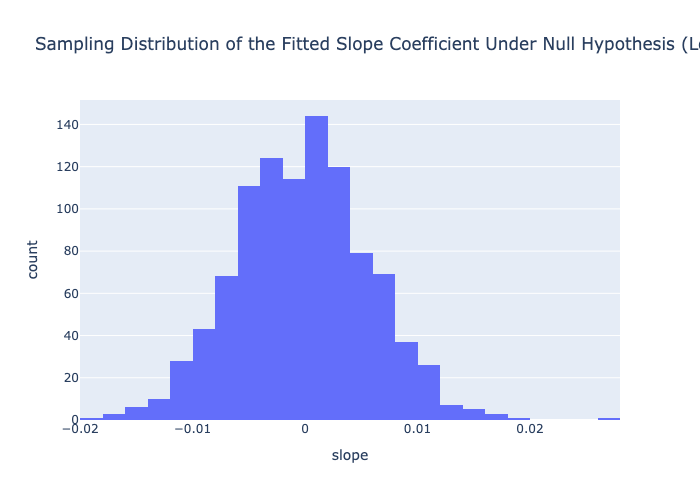

In [48]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Parameters
n_simulations = 1000  # Number of simulations
n = 160  # Sample size for each simulation
beta_0 = 1.65  # Intercept
beta_1 = 0  # Slope (no linear relationship under null hypothesis)
sigma = 0.37  # Standard deviation of noise

# Filter long wait times from the original dataset
long_wait = old_faithful[old_faithful.waiting > 71]

# Initialize an array to store the slope coefficients
slope_coefficients = []

# Simulate samples and fit the model
for _ in range(n_simulations):
    # Randomly sample 'waiting' from the filtered 'long_wait' dataset
    waiting = np.random.choice(long_wait.waiting, size=n, replace=True)
    
    # Simulate 'duration' based on the model with intercept = 1.65 and no slope (beta_1 = 0)
    noise = np.random.normal(loc=0, scale=sigma, size=n)
    duration = beta_0 + noise  # No linear effect from 'waiting', just noise
    
    # Create a DataFrame for the simulated data
    simulated_data = pd.DataFrame({'waiting': waiting, 'duration': duration})
    
    # Fit the linear regression model (assuming null hypothesis: no linear relationship)
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Store the slope coefficient
    slope_coefficients.append(model.params['waiting'])

# Convert the results into a DataFrame
slope_df = pd.DataFrame(slope_coefficients, columns=['slope'])

# Plot the distribution of the fitted slope coefficients
fig = px.histogram(slope_df, x='slope', nbins=30,
                   title="Sampling Distribution of the Fitted Slope Coefficient Under Null Hypothesis (Long Wait Times)")
fig.show(renderer="png")

In [49]:
lower_bound = np.percentile(slope_df['slope'], 2.5)
upper_bound = np.percentile(slope_df['slope'], 97.5)
print(f"95% Bootstrapped Confidence Interval: ({lower_bound}, {upper_bound})")

contains_zero = (lower_bound <= 0 <= upper_bound)
print(f"Does 0 fall within the 95% CI? {contains_zero}")

95% Bootstrapped Confidence Interval: (-0.011633397578598922, 0.011387211187916677)
Does 0 fall within the 95% CI? True


In [50]:
model_actual = smf.ols('duration ~ waiting', data=long_wait).fit()

observed_slope = model_actual.params['waiting']
observed_p_value = model_actual.pvalues['waiting']
print(f"Observed Slope from Real Data: {observed_slope}")
print(f"Observed p-value from Real Data: {observed_p_value}")

simulated_p_value = np.mean(np.abs(slope_df['slope']) >= np.abs(observed_slope))
print(f"Simulated p-value from bootstrapped slopes: {simulated_p_value}")

Observed Slope from Real Data: 0.012244029446523483
Observed p-value from Real Data: 0.038135755338567744
Simulated p-value from bootstrapped slopes: 0.033


##### Chat Summary 

https://chatgpt.com/share/672d051f-1bd8-8013-8f79-c797582a4607

Objective
The task involved assessing the relationship between waiting times and duration of eruptions for the Old Faithful geyser, specifically under the condition of "long wait times" (i.e., waiting > 71 minutes). Our objective was to:
Simulate samples under a null hypothesis of no linear association (𝛽_1 = 0) and analyze the sampling distribution of the fitted slope coefficients.
Compare the observed OLS regression results from the real data subset (long_wait = old_faithful.waiting > 71) with the bootstrapped sampling distribution of slope coefficients to see if the null hypothesis holds.

Approach 
Data Simulation: We filtered the original old_faithful dataset for entries with waiting > 71 to define "long wait times."
For each of 1,000 simulations, we sampled waiting values from this subset and generated duration values based on a null model: duration = 1.65 + 𝜖 where 𝜖 ∼ 𝑁(0, 0.37). This model assumes no linear association between waiting and duration under the null hypothesis.
Model Fitting and Analysis: For each simulated dataset, we fitted a simple linear regression (duration ~ waiting) and collected the slope coefficient. This generated a bootstrapped sampling distribution for the slope under the null hypothesis. We calculated a 95% confidence interval for the slope coefficients and determined if zero was included, suggesting no significant association on average. 
Comparison with Observed Data: We fitted an OLS model (duration ~ waiting) on the real long_wait subset, extracting the observed slope and p-value. The observed slope was compared to the simulated slope distribution, and we calculated a simulated p-value to test how often we would observe a slope as extreme as the observed value under the null hypothesis.

Results
Bootstrapped Confidence Interval: The 95% bootstrapped confidence interval for the slope coefficients was computed. If this interval included zero, it suggested no significant linear relationship in the simulated data.
Consistency with Observed Results: The observed slope and p-value from the real data were checked against the simulated slope distribution. A similar p-value between the observed and simulated results indicated consistency, suggesting that our simulated model was a reasonable approximation of the real data under the null hypothesis.

Conclusion
The simulation allowed us to assess the hypothesis of no linear association between waiting and duration for long wait times. By comparing the real data’s slope and p-value to the simulated distribution, we evaluated the plausibility of the null hypothesis. If the observed values aligned closely with the bootstrapped results, this would support the null hypothesis for long wait times in this context.


### Question 11

<class 'statsmodels.iolib.table.SimpleTable'>

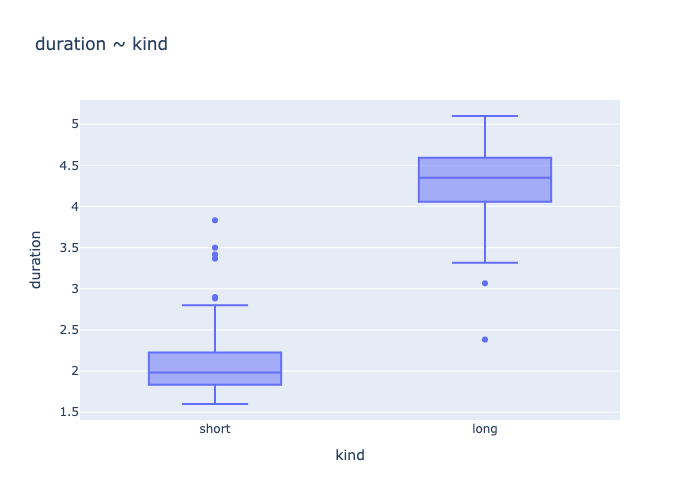

In [51]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [52]:
old_faithful

duration  waiting   kind
0       3.600       79   long
1       1.800       54  short
2       3.333       74   long
3       2.283       62  short
4       4.533       85   long
..        ...      ...    ...
267     4.117       81   long
268     2.150       46  short
269     4.417       90   long
270     1.817       46  short
271     4.467       74   long

[272 rows x 3 columns]

In the current model, we are using a categorical variable called, "kind", to discretely compare the "short" and "long" times. It's discrete because, it's either "long" or "short". Unlike the models before hand using old_faithful[short_wait], old_faithful[long_wait] or old_faithful. Because in those three models, the predicators are able to take on a range of values, or in the case of old_faithful, be allowed to take on all the values. It allows for a more precise relationship between the outcome (duration) and the predicator (waiting). 

Our null hypothesis of there is no difference between the groups would mean that $\beta_{\textrm{contrast}} = 0$. Using a significance level of 0.05, $\alpha = 0.05$, we can see from the regression summary table[1] that the p-value of the \beta_{\textrm{contrast}}$ = 0. So, it provides very strong evidence against the null hypothesis. Therefore, we can safely reject the null hypothesis, and conclude that there is indeed a difference in the duration between the "long" and "short" groups. 

##### Chat Summary

https://chatgpt.com/share/672d2c1a-5870-8013-b63d-3ba78101e86a

Indicator Variable Explanation:
An indicator variable (also known as a dummy variable) is a binary variable (0 or 1) used to represent categorical data in statistical models. It helps convert categorical variables into a format that can be used in regression analysis, where each category is represented by a separate variable.

Regression Model Explanation:
In the regression formula 'duration ~ C(kind, Treatment(reference="short"))', the categorical variable kind is treated with treatment coding where "short" is set as the reference category.
The coefficient for C(kind, Treatment(reference="short"))[T.long] represents the difference in duration between the "long" and "short" categories. A positive coefficient indicates that "long" eruptions have a higher average duration compared to "short" eruptions.

Difference between Models:
First Model (duration ~ C(kind, Treatment(reference="short"))): Uses a categorical variable (kind), where the model compares duration between the two categories: "short" and "long".
Second Model (duration ~ waiting for old_faithful[long_wait]): Uses a continuous variable (waiting) to predict duration, with the data filtered to include only those eruptions where the waiting time is greater than a specified limit (71).

Discrete vs. Continuous Models:
The first model is discrete because it compares the mean duration between two distinct categories of kind ("short" and "long").
The second model is continuous because it measures the relationship between waiting (a continuous variable) and duration, looking at how duration changes with each unit increase in waiting.

Hypothesis Test Using Indicator Variable-Based Model:
The null hypothesis for the first model is that there is no difference in duration between the "short" and "long" categories (𝛽_"long" = 0).
If the p-value for the coefficient of "long" is less than 0.05, we reject the null hypothesis, indicating a significant difference between the two categories.
If the p-value is reported as 0, it suggests an extremely strong statistical significance for the difference in duration between the "short" and "long" groups, leading us to reject the null hypothesis.

### Question 12

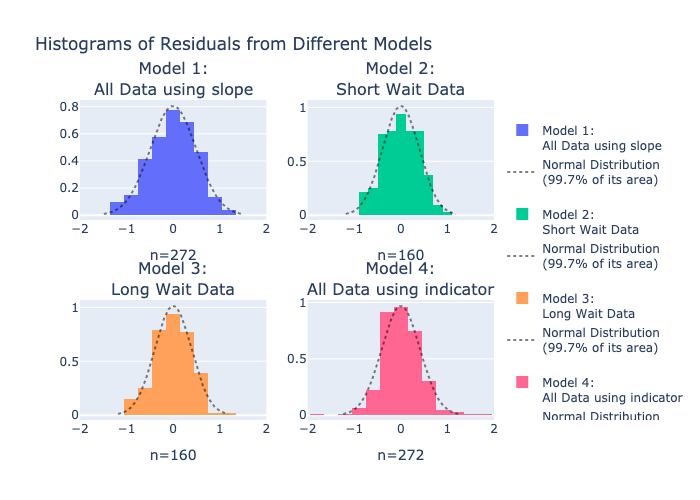

In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful['waiting'] < 62 ).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful['waiting'] > 71).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Using the model 1 histogram, we can deduce that the error term is normally distributed. For model 2 and 4 although 99.7% of its area is within the normal distribution curve, it's shape is not unimodal or symmetric. So those two can be safely ruled out in terms of the plausibility of error term being normal. Then for model 3, it only includes "Long Wait Data", so it's not a true representation of the entire data set. So, we are able to conclude that model 1 suggests the plausibilty of the assumption that the distribution of the error term is normal in each of the models.

##### Chat Summary (Custom Chatbot)

The conversation began with a question about which of the four provided graphs suggests the plausibility of a normal distribution for the error term. The initial response explained that the plausibility of normally distributed error terms in Simple Linear Regression is assessed by examining the shape of the distribution of residuals.
The response further highlighted that Models 1 and 3 exhibit unimodal and symmetric distributions of residuals, consistent with a normal distribution. However, it noted that Models 2 and 4 do not show this pattern.
The next question incorrectly asserted that Models 2 and 4 are normally distributed because 99.7% of their area falls under the normal distribution bell curve. The response clarified that while 99.7% of the area under a normal distribution curve falls within three standard deviations of the mean, this doesn't automatically mean any distribution with this characteristic is normal. It emphasized that the specific bell shape is crucial for identifying a normal distribution, and Models 2 and 4 lack this shape.
The final question sought to understand whether Model 1 might better suggest normal error terms because it uses all the data, compared to Model 3, which uses only long wait data. The response reiterated that normality is assessed based on the shape of the residual distribution. It acknowledged that both Model 1 and Model 3 exhibit unimodal and symmetric distributions, supporting the plausibility of normal error terms for both models. However, it cautioned that factors like sample size and outliers can influence the appearance of normality and should be considered

##### Chat Summary 

https://chatgpt.com/share/672d84d0-dfb4-8013-8db1-e95bf82181d3

Error Troubleshooting:
User initially encountered a ValueError: Boolean array expected for the condition, not object when attempting to use conditions (short_wait, long_wait) to filter data for regression models in a Python script. The issue was related to how short_wait and long_wait were defined, which needed to be Boolean arrays or conditions based on the waiting column of the old_faithful dataframe. I suggested explicitly defining short_wait and long_wait as conditions, or directly embedding those conditions within the dictionary.

KeyError Issue:
User then encountered a KeyError with the message: "None of [Index([...])] are in the [columns]."
The error was due to the incorrect reference to the waiting column. I recommended using old_faithful['waiting'] instead of just waiting when indexing the DataFrame, which resolved the issue.

Normality of Residuals:
After correcting the code, the user inquired about which of the histograms of residuals suggested the plausibility of the assumption that the error term is normally distributed.
I explained that the histogram of the model using all data (without segmentation) would suggest the plausibility of normality if it closely followed a normal distribution. The user clarified that both the all data model and the all data with indicator variable models showed similarly normally distributed residuals.
I confirmed that if both models’ residuals were equally normal, either model could satisfy the normality assumption. The indicator model may still offer better interpretability by accounting for differences between short and long waits.

### Question 13
#### (A)

In [93]:
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Initializing permutation test parameters
num_permutations = 1000
mean_diffs_lst = []

# Performing the permutation test
for _ in range(num_permutations):
    old_faithful = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values);
    # Calculate the mean difference for this permutation
    mean_diff = old_faithful.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    # Append the result
    mean_diffs_lst.append(mean_diff)

# Calculating the p-value
mean_diffs_array = np.array(mean_diffs_lst)
p_value = np.mean(np.abs(mean_diffs_array) >= np.abs(observed_diff))

observed_diff, p_value

(2.20360023255814, 0.0)

##### Chat Summary 

https://chatgpt.com/share/672d8534-da08-8013-bacb-8bfa4a29e245

Permutation Test Concept:
We discussed how a permutation test works, explaining its use as a non-parametric statistical method to compare two groups by comparing an observed statistic to a distribution of statistics generated by shuffling the data.

Initial Code Implementation:
You provided a piece of code to perform a permutation test on the old faithful dataset, where you aimed to test the null hypothesis that the mean durations for "short" and "long" eruptions are equal. However, it was pointed out that the shuffling operation wasn't persisting in the loop, causing the same result to be appended to the list across all iterations.

Identifying the Issue:
After observing that the mean differences in the list were identical, we identified the issue: you were using the original kind column to calculate the mean differences instead of using the shuffled kind_shuffled column. This resulted in repeated calculations using the original data in each iteration of the loop.

Code Fix and Explanation:
The code was modified to: Assign the shuffled kind_shuffled column back to the DataFrame during each iteration using assign().
Perform the mean difference calculation based on kind_shuffled instead of the original kind column.

Outcome:
After making the changes, the permutation test successfully generated varying mean differences for each permutation, and the p-value was calculated based on the observed and permuted values.


#### (B) 
I don't know why I couldn't get the code Prof. Schwartz provided to work. 

In [92]:
# Number of bootstrap iterations
n_iterations = 10000

# Initialize a list to store the bootstrapped mean differences
bootstrapped_mean_differences = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Resample within each group by sampling with replacement
    resampled_short = old_faithful[old_faithful['kind'] == 'short'].sample(n=len(old_faithful[old_faithful['kind'] == 'short']), replace=True)
    resampled_long = old_faithful[old_faithful['kind'] == 'long'].sample(n=len(old_faithful[old_faithful['kind'] == 'long']), replace=True)

    # Calculate the mean difference between the two resampled groups
    mean_diff = resampled_long['duration'].mean() - resampled_short['duration'].mean()
    bootstrapped_mean_differences.append(mean_diff)

# Calculate the 95% confidence interval
ci_95 = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print(f"95% bootstrapped confidence interval: {ci_95}")

95% bootstrapped confidence interval: [2.10201769 2.30031784]


##### Chat Summary 

https://chatgpt.com/share/672d89c8-2d50-8013-b3bd-72c37cbcd47d

Bootstrapped Confidence Interval:
You asked for help in creating a 95% bootstrapped confidence interval using the old faithful dataset. The goal was to compute this interval by repeatedly bootstrapping within each group. You provided code snippets that I used to guide the process. We used the apply() method in pandas to perform the bootstrapping, but encountered a deprecation warning related to how the apply() function handles grouping columns.

Deprecation Warning Resolution:
You received a DeprecationWarning related to the use of apply() with groupings. I explained that pandas will change its behavior in future versions and suggested using group_keys=False to resolve the warning. This solution ensured that the grouping columns were excluded from the operation, preventing the warning.

Alternative Method Without apply():
You requested an alternative solution to calculate the bootstrapped confidence interval without using the apply() function. I provided an approach where the short and long groups were sampled separately using the sample() method and the mean difference between the two resampled groups was computed. This solution avoided the apply() function entirely while achieving the same result.

#### (a)
In question (A), we were sampling the kind column without replacement, essentially creating a shuffling effect. Then in question (B), we are sampling the values of the "durations" themselves directly with replacement, but we separate the "long" and "short" "kinds". 

#### (b)
In both question (A) and (B), the "kind" variable are used. So in both cases we use the discrete nature of "kind". For (A) we created a new variable called "kind_shuffle" that is reshuffled for every iteration, and the "kind" variable isn't actually used. For (B) there is no difference in how "kind" is used. 

### Question 14
Yes I have consulted wiki textbook to look for answers and deepen my understanding. Chatbots has been helpful, but I've found the custom Chatbot is actually less helpful. The language used in the custom Chatbot is a lot more confusing and difficult to understand. I am hoping to attend OH some time to clarify some questions I have. I am confused about 